# <font color = 'pickle'>**Extractive Question Answering Given Context with SQuad** </font>


## Outline
1. **Setting up the Environment**: Installing necessary libraries and setting up paths.
2. **Exploring and Understanding IMDB Dataset**: Understanding the structure and content of the dataset.

3. **Data Preprocessing**: Techniques to prepare the data for training, including handling different data splits and tokenization
4. **Training the Model**: Feeding data and adjusting weights.
5. **Inference**: Evaluate model on test set and making predictions.



# <font color = 'pickle'> **Setting up the Environment** </font>

In [1]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    !pip install datasets transformers evaluate wandb accelerate -U -qq
    base_folder = Path("/content/drive/MyDrive/data")


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [2]:
# import textwrap
import textwrap
def print_wrap(text, d, highlight = False,highlight_word = None):
    # If the text is a list, convert it to a string
    if isinstance(text, list):
        # Convert None values to a default string (e.g., "None" or an empty string)
        text = ' '.join(str(item) if item is not None else "None" for item in text)

    if highlight:
        # Highlight the word
        text = text.replace(highlight_word, f'\033[91m{highlight_word}\033[0m')
    # Wrap the text to limit the width to 'd'
    wrapped_text = textwrap.fill(text, width=d)

    # Print the wrapped text
    print(wrapped_text)


def print_wrap_dict(data, d):
    for key, value in data.items():
        # Wrap and print the key
        wrapped_key = textwrap.fill(key + ':', width=d)
        print(wrapped_key, end=' ')

        # Convert the list values to a string and wrap it
        value_string = ', '.join(map(str, value))
        wrapped_value = textwrap.fill(value_string, width=d, subsequent_indent=' ' * (len(key) + 2))

        # Print the wrapped value
        print(wrapped_value)

# <font color = 'pickle'> **Exploring and Understanding Dataset**

## <font color = 'pickle'> **Load Data set**
    


In [3]:
from datasets import load_dataset

In [4]:
squad_dataset = load_dataset("squad")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

## <font color = 'pickle'> **Understanding your data**

In [5]:
print(squad_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})


## <font color = 'pickle'> **Understanding the datatype of columns**


In [6]:
squad_dataset['train'].features

{'id': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'context': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None)}

## <font color = 'pickle'> **Acess indivdual element** </font>
 The dataset behaves like an Python array or list. We can use the familiar indexing/slicing methods to access individual elements.

In [7]:
# get the first example of the dataset
squad_dataset['train'][0]


{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [8]:
print("Context:")
print_wrap(squad_dataset["train"][0]["context"], 80)
print("\nQuestion:")
print_wrap(squad_dataset["train"][0]["question"], 80)
print("\nAnswer:")
print(squad_dataset["train"][0]["answers"])


Context:
Architecturally, the school has a Catholic character. Atop the Main Building's
gold dome is a golden statue of the Virgin Mary. Immediately in front of the
Main Building and facing it, is a copper statue of Christ with arms upraised
with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica
of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian
place of prayer and reflection. It is a replica of the grotto at Lourdes, France
where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858.
At the end of the main drive (and in a direct line that connects through 3
statues and the Gold Dome), is a simple, modern stone statue of Mary.

Question:
To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?

Answer:
{'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}


## <font color = 'pickle'> **Exploratory Data Analysis (EDA)**

### <font color = 'pickle'> **Change dataset format to Pandas**  </font>
We will convert the datasets to Pandas DataFrames for visualization and Exploratory Data Analysis (EDA) because Pandas provides a wide range of tools and functions that simplify data manipulation, aggregation, and visualization, making it an ideal choice for these tasks

In [9]:
# this will convert all the splits into Pandas dataframe
squad_dataset.set_format(type='pandas')

In [10]:
# get all rows from tarining split
df_train = squad_dataset['train'][:]
df_valid = squad_dataset['validation'][:]

In [11]:
df_train.head()


,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87599 entries, 0 to 87598
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        87599 non-null  object
 1   title     87599 non-null  object
 2   context   87599 non-null  object
 3   question  87599 non-null  object
 4   answers   87599 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


### <font color = 'pickle'> **Check Number of answers** </font>
Let us check how many answers we have per question

In [13]:
# check distribution of class labels in training dataset
df_train['number_answers'] = df_train['answers'].apply(lambda x: len(x['text']))


In [14]:
df_train['number_answers'].value_counts()

1    87599
Name: number_answers, dtype: int64

In [15]:
df_valid['number_answers'] = df_valid['answers'].apply(lambda x: len(x['text']))

In [16]:
df_valid['number_answers'].value_counts()

3    8490
5    1147
4     759
2     136
6      35
1       3
Name: number_answers, dtype: int64

In [17]:
df_valid['answers'][0]

{'text': array(['Denver Broncos', 'Denver Broncos', 'Denver Broncos'], dtype=object),
 'answer_start': array([177, 177, 177], dtype=int32)}

In [18]:
print_wrap(df_valid['context'][2], 90)

Super Bowl 50 was an American football game to determine the champion of the National
Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion
Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers
24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at
Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the
50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed
initiatives, as well as temporarily suspending the tradition of naming each Super Bowl
game with Roman numerals (under which the game would have been known as "Super Bowl L"),
so that the logo could prominently feature the Arabic numerals 50.


In [19]:
print_wrap(df_valid['question'][2], 90)

Where did Super Bowl 50 take place?


In [20]:
print(df_valid['answers'][2])

{'text': array(['Santa Clara, California', "Levi's Stadium",
       "Levi's Stadium in the San Francisco Bay Area at Santa Clara, California."],
      dtype=object), 'answer_start': array([403, 355, 355], dtype=int32)}


### <font color = 'pickle'> **Check length of the Context** </font>


In [21]:
df_train['words_per_context'] = df_train['context'].str.split().apply(len)
df_valid['words_per_context'] = df_valid['context'].str.split().apply(len)


#### <font color = 'pickle'> **Plot the distribution of review length** </font>

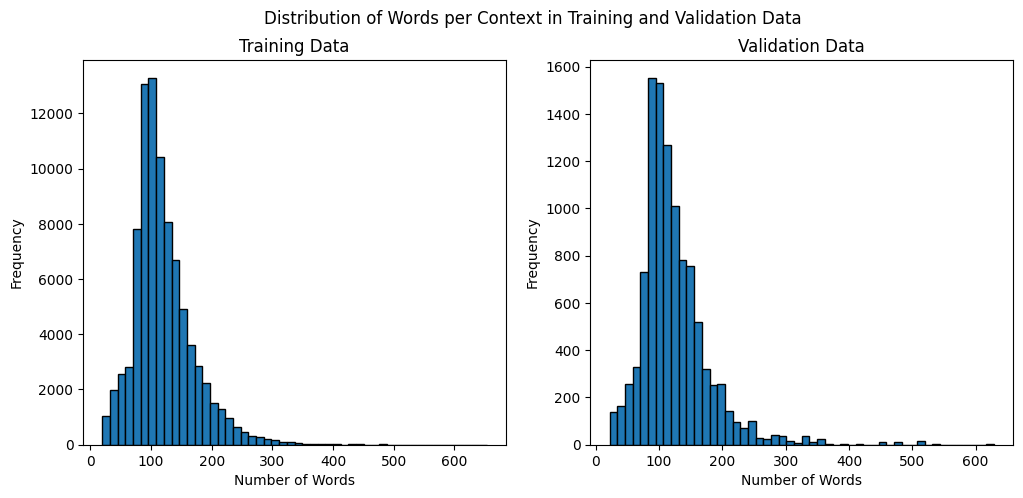

In [22]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Plot a histogram for the training data in the first subplot
axes[0].hist(df_train['words_per_context'], bins=50, edgecolor='black')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

# Plot a histogram for the validation data in the second subplot
axes[1].hist(df_valid['words_per_context'], bins=50, edgecolor='black')
axes[1].set_title('Validation Data')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

# Add a main title for the entire figure
plt.suptitle('Distribution of Words per Context in Training and Validation Data')

# Display the plot
plt.show()



In [23]:
# The model we are going to use has token (subwords) limit of 512.
# Let us check how many reviews has more than 400 words

count_train = (df_train['words_per_context'] > 400).sum()
count_valid = (df_valid['words_per_context'] > 400).sum()
print(f"Number of contexts with more than 400 words: {count_train}, {count_valid}")


Number of contexts with more than 400 words: 75, 49


### <font color = 'pickle'> **Reset dataset format** </font>


In [24]:
squad_dataset.reset_format()

In [25]:
squad_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

# <font color = 'pickle'> **Data Pre-processing**</font>

### <font color = 'pickle'> **Extract Splits**

In [26]:
squad = load_dataset("squad", split="train[:5000]")
squad = squad.train_test_split(test_size=0.2)


In [27]:
squad

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 1000
    })
})

In [28]:
print_wrap_dict(squad["train"][0:1], 100)

id: 56d4dfc82ccc5a1400d832cd
title: Beyoncé
context: Beyoncé names Michael Jackson as her major musical influence. Aged five, Beyoncé attended her first
         ever concert where Jackson performed and she claims to have realised her purpose. When she
         presented him with a tribute award at the World Music Awards in 2006, Beyoncé said, "if it
         wasn't for Michael Jackson, I would never ever have performed." She admires Diana Ross as
         an "all-around entertainer" and Whitney Houston, who she said "inspired me to get up there
         and do what she did." She credits Mariah Carey's singing and her song "Vision of Love" as
         influencing her to begin practicing vocal runs as a child. Her other musical influences
         include Aaliyah, Prince, Lauryn Hill, Sade Adu, Donna Summer, Mary J. Blige, Janet Jackson,
         Anita Baker and Rachelle Ferrell.
question: Who does she credit for the inspiration to "get up there and do what she did"?
answers: {'text': [

## <font color = 'pickle'> **Tokenization**</font>

###  <font color = 'pickle'> **Load pre-trained Tokenizer** </font>

In [29]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

###  <font color = 'pickle'> **Understanding Tokenization Questions-Context pair**
We will now understand how the tokenizer work by feeding one simple example.

####  <font color = 'pickle'> **One example**

In [30]:
context = squad["train"][0]["context"]
question = squad["train"][0]["question"]
answer = squad["train"][0]["answers"]

In [31]:
print_wrap(context, 100)
print()
print_wrap(question, 100)
print()
print_wrap_dict(answer, 100)

Beyoncé names Michael Jackson as her major musical influence. Aged five, Beyoncé attended her first
ever concert where Jackson performed and she claims to have realised her purpose. When she presented
him with a tribute award at the World Music Awards in 2006, Beyoncé said, "if it wasn't for Michael
Jackson, I would never ever have performed." She admires Diana Ross as an "all-around entertainer"
and Whitney Houston, who she said "inspired me to get up there and do what she did." She credits
Mariah Carey's singing and her song "Vision of Love" as influencing her to begin practicing vocal
runs as a child. Her other musical influences include Aaliyah, Prince, Lauryn Hill, Sade Adu, Donna
Summer, Mary J. Blige, Janet Jackson, Anita Baker and Rachelle Ferrell.

Who does she credit for the inspiration to "get up there and do what she did"?

text: Whitney Houston
answer_start: 404


In [32]:
encoded_text = tokenizer(context, question)

In [33]:
print_wrap_dict(encoded_text, 120)

input_ids: 101, 20773, 3415, 2745, 4027, 2004, 2014, 2350, 3315, 3747, 1012, 4793, 2274, 1010, 20773, 3230, 2014, 2034, 2412, 4164,
           2073, 4027, 2864, 1998, 2016, 4447, 2000, 2031, 11323, 2014, 3800, 1012, 2043, 2016, 3591, 2032, 2007, 1037,
           7050, 2400, 2012, 1996, 2088, 2189, 2982, 1999, 2294, 1010, 20773, 2056, 1010, 1000, 2065, 2009, 2347, 1005,
           1056, 2005, 2745, 4027, 1010, 1045, 2052, 2196, 2412, 2031, 2864, 1012, 1000, 2016, 19837, 2015, 8805, 5811,
           2004, 2019, 1000, 2035, 1011, 2105, 21751, 1000, 1998, 9809, 5395, 1010, 2040, 2016, 2056, 1000, 4427, 2033,
           2000, 2131, 2039, 2045, 1998, 2079, 2054, 2016, 2106, 1012, 1000, 2016, 6495, 3814, 2232, 11782, 1005, 1055,
           4823, 1998, 2014, 2299, 1000, 4432, 1997, 2293, 1000, 2004, 25870, 2014, 2000, 4088, 12560, 5554, 3216, 2004,
           1037, 2775, 1012, 2014, 2060, 3315, 8092, 2421, 9779, 3669, 17560, 1010, 3159, 1010, 21360, 18143, 2940,
           1010, 6517, 2063, 47

In [34]:
tokens = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids)

print_wrap(tokens, 100)

[CLS] beyonce names michael jackson as her major musical influence . aged five , beyonce attended
her first ever concert where jackson performed and she claims to have realised her purpose . when
she presented him with a tribute award at the world music awards in 2006 , beyonce said , " if it
wasn ' t for michael jackson , i would never ever have performed . " she admire ##s diana ross as an
" all - around entertainer " and whitney houston , who she said " inspired me to get up there and do
what she did . " she credits maria ##h carey ' s singing and her song " vision of love " as
influencing her to begin practicing vocal runs as a child . her other musical influences include aa
##li ##yah , prince , lau ##ryn hill , sad ##e ad ##u , donna summer , mary j . b ##li ##ge , janet
jackson , anita baker and rachel ##le fe ##rrell . [SEP] who does she credit for the inspiration to
" get up there and do what she did " ? [SEP]


In [35]:
print_wrap(tokenizer.decode(encoded_text['input_ids']), 100)


[CLS] beyonce names michael jackson as her major musical influence. aged five, beyonce attended her
first ever concert where jackson performed and she claims to have realised her purpose. when she
presented him with a tribute award at the world music awards in 2006, beyonce said, " if it wasn't
for michael jackson, i would never ever have performed. " she admires diana ross as an " all -
around entertainer " and whitney houston, who she said " inspired me to get up there and do what she
did. " she credits mariah carey's singing and her song " vision of love " as influencing her to
begin practicing vocal runs as a child. her other musical influences include aaliyah, prince, lauryn
hill, sade adu, donna summer, mary j. blige, janet jackson, anita baker and rachelle ferrell. [SEP]
who does she credit for the inspiration to " get up there and do what she did "? [SEP]


#####  <font color = 'pickle'> **Split Context into multiple chunks**

In [36]:
encoded_text = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
)

In [37]:
print_wrap_dict(encoded_text, 120)

input_ids: [101, 2040, 2515, 2016, 4923, 2005, 1996, 7780, 2000, 1000, 2131, 2039, 2045, 1998, 2079, 2054, 2016, 2106, 1000, 1029,
           102, 20773, 3415, 2745, 4027, 2004, 2014, 2350, 3315, 3747, 1012, 4793, 2274, 1010, 20773, 3230, 2014, 2034,
           2412, 4164, 2073, 4027, 2864, 1998, 2016, 4447, 2000, 2031, 11323, 2014, 3800, 1012, 2043, 2016, 3591, 2032,
           2007, 1037, 7050, 2400, 2012, 1996, 2088, 2189, 2982, 1999, 2294, 1010, 20773, 2056, 1010, 1000, 2065, 2009,
           2347, 1005, 1056, 2005, 2745, 4027, 1010, 1045, 2052, 2196, 2412, 2031, 2864, 1012, 1000, 2016, 19837, 2015,
           8805, 5811, 2004, 2019, 1000, 2035, 1011, 102], [101, 2040, 2515, 2016, 4923, 2005, 1996, 7780, 2000, 1000,
           2131, 2039, 2045, 1998, 2079, 2054, 2016, 2106, 1000, 1029, 102, 2014, 3800, 1012, 2043, 2016, 3591, 2032,
           2007, 1037, 7050, 2400, 2012, 1996, 2088, 2189, 2982, 1999, 2294, 1010, 20773, 2056, 1010, 1000, 2065, 2009,
           2347, 1005, 1056, 200

In [38]:
for i in range(len(encoded_text['input_ids'])):
    print(f'chunk {i+1}:')
    chunk_text = tokenizer.decode(
        encoded_text.input_ids[i])
    print_wrap(chunk_text, 100, highlight = True, highlight_word = 'phoenix house')
    print()


chunk 1:
[CLS] who does she credit for the inspiration to " get up there and do what she did "? [SEP] beyonce
names michael jackson as her major musical influence. aged five, beyonce attended her first ever
concert where jackson performed and she claims to have realised her purpose. when she presented him
with a tribute award at the world music awards in 2006, beyonce said, " if it wasn't for michael
jackson, i would never ever have performed. " she admires diana ross as an " all - [SEP]

chunk 2:
[CLS] who does she credit for the inspiration to " get up there and do what she did "? [SEP] her
purpose. when she presented him with a tribute award at the world music awards in 2006, beyonce
said, " if it wasn't for michael jackson, i would never ever have performed. " she admires diana
ross as an " all - around entertainer " and whitney houston, who she said " inspired me to get up
there and do what she did. " she credits mariah [SEP]

chunk 3:
[CLS] who does she credit for the inspiration

<font color = 'pickle' size = 4> **Which chunk(s) has the answer?**


<font color = 'pickle' size = 4> **overflow_to_sample_mapping**

In [39]:
encoded_text['overflow_to_sample_mapping']

[0, 0, 0, 0, 0]

####  <font color = 'pickle'> **Multiple Examples**

In [40]:
inputs = tokenizer(
    squad["train"][0:4]["question"],
    squad["train"][0:4]["context"],
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,

)

print(f"The small dataset has  {len(inputs['input_ids'])} chunks.")
print(f"Mapping of chunks to documents")
print_wrap(inputs['overflow_to_sample_mapping'], 100)

The small dataset has  16 chunks.
Mapping of chunks to documents
0 0 0 0 0 1 1 1 1 1 1 1 2 2 3 3


###  <font color = 'pickle'> **Understanding Tokenization and alignment of Answers** </font>

For each chunk obtained, assign it the appropriate label as previously. The labels are defined as follows:

- Label it as (0, 0) if the answer does not fall within the specific chunk of the context.
- Assign it a label of (start_position, end_position) if the answer is contained within the chunk. Here, 'start_position' refers to the index of the token marking the beginning of the answer in the input IDs, and 'end_position' denotes the index of the token marking the end of the answer in the input IDs.
- Teh tokenizer is sub-word tokenizer, hence to accurately get start_position and end_position, we will also need **offset mappings** as we did in **token classification task**.


inputs = tokenizer(
    train_val_small["train"]["question"],
    train_val_small["train"]["context"],
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)

In [41]:
inputs = tokenizer(
    squad["train"][0:2]["question"],
    squad["train"][0:2]["context"],
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)

In [42]:
len(inputs['input_ids'])

12

####  <font color = 'pickle'> **Offsets_mapping** </font>

In [43]:
print(len(inputs['offset_mapping'][0]))
print(len(inputs['offset_mapping'][1]))
print(len(inputs['offset_mapping'][2]))
print(len(inputs['offset_mapping'][3]))
print(len(inputs['offset_mapping'][4]))
print(len(inputs['offset_mapping'][5]))
print(len(inputs['offset_mapping'][6]))
print(len(inputs['offset_mapping'][7]))

100
100
100
100
81
100
100
100


In [44]:
inputs['offset_mapping'][0][0:10]

[(0, 0),
 (0, 3),
 (4, 8),
 (9, 12),
 (13, 19),
 (20, 23),
 (24, 27),
 (28, 39),
 (40, 42),
 (43, 44)]

####  <font color = 'pickle'> **Sequence_IDs** </font>

In [45]:
print(len(inputs.sequence_ids(0)))
print(len(inputs.sequence_ids(1)))
print(len(inputs.sequence_ids(2)))
print(len(inputs.sequence_ids(3)))
print(len(inputs.sequence_ids(4)))
print(len(inputs.sequence_ids(5)))
print(len(inputs.sequence_ids(6)))
print(len(inputs.sequence_ids(7)))

100
100
100
100
81
100
100
100


In [46]:
print_wrap(inputs.sequence_ids(0), 100)

None 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 None 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 None


In [47]:
print_wrap(inputs["overflow_to_sample_mapping"], 100)

0 0 0 0 0 1 1 1 1 1 1 1


In [48]:
i = 0
sample_idx = inputs["overflow_to_sample_mapping"][i]
sequence_ids = inputs.sequence_ids(i)
offset = inputs.offset_mapping[i]


In [49]:
sample_idx

0

In [50]:
print_wrap(sequence_ids, 100)

None 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 None 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 None


In [51]:
print_wrap(offset, 100)

(0, 0) (0, 3) (4, 8) (9, 12) (13, 19) (20, 23) (24, 27) (28, 39) (40, 42) (43, 44) (44, 47) (48, 50)
(51, 56) (57, 60) (61, 63) (64, 68) (69, 72) (73, 76) (76, 77) (77, 78) (0, 0) (0, 7) (8, 13) (14,
21) (22, 29) (30, 32) (33, 36) (37, 42) (43, 50) (51, 60) (60, 61) (62, 66) (67, 71) (71, 72) (73,
80) (81, 89) (90, 93) (94, 99) (100, 104) (105, 112) (113, 118) (119, 126) (127, 136) (137, 140)
(141, 144) (145, 151) (152, 154) (155, 159) (160, 168) (169, 172) (173, 180) (180, 181) (182, 186)
(187, 190) (191, 200) (201, 204) (205, 209) (210, 211) (212, 219) (220, 225) (226, 228) (229, 232)
(233, 238) (239, 244) (245, 251) (252, 254) (255, 259) (259, 260) (261, 268) (269, 273) (273, 274)
(275, 276) (276, 278) (279, 281) (282, 286) (286, 287) (287, 288) (289, 292) (293, 300) (301, 308)
(308, 309) (310, 311) (312, 317) (318, 323) (324, 328) (329, 333) (334, 343) (343, 344) (344, 345)
(346, 349) (350, 356) (356, 357) (358, 363) (364, 368) (369, 371) (372, 374) (375, 376) (376, 379)
(379, 380)

In [52]:
answers = squad["train"][0:2]["answers"]
answers

[{'text': ['Whitney Houston'], 'answer_start': [404]},
 {'text': ['11 million'], 'answer_start': [419]}]

In [53]:
answer = answers[sample_idx]
answer

{'text': ['Whitney Houston'], 'answer_start': [404]}

In [54]:
answer_start_char = answer["answer_start"][0]
answer_end_char = answer["answer_start"][0] + len(answer["text"][0])
answer_start_char, answer_end_char

(404, 419)

In [55]:
# Find the start and end of the context
idx = 0
while sequence_ids[idx] != 1:
    idx += 1
context_start = idx
while sequence_ids[idx] == 1:
    idx += 1
context_end = idx - 1
context_start, context_end

(21, 98)

In [56]:
context_start_char, context_end_char = offset[context_start][0], offset[context_end][1]
context_start_char, context_end_char

(0, 380)

In [57]:
# check if the answer is NOT fully inside the context
# if context starting after the answer or context ending before the answer
context_start_char > answer_start_char or  context_end_char < answer_end_char

True

In [58]:
# if the answer is NOT fully inside the context
if context_start_char > answer_start_char or  context_end_char < answer_end_char:
    start_position = 0
    end_position = 0
# if the answer is fully inside the context
else:
    idx = context_start
    # get the index of token where the answer starts
    while idx <= context_end and offset[idx][0] <= answer_start_char:
        idx += 1
    start_position = idx - 1

    idx = context_end
    while idx >= context_start and offset[idx][1] >= answer_end_char:
        idx -= 1
    end_position= idx + 1

start_position, end_position

(0, 0)

##  <font color = 'pickle'> **Create Custom Processing Functions**

###   <font color = 'pickle'> **Process Training data - Only one answer**

In [59]:
max_length = 384
stride = 128

def preprocess_training_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_map[i]
        answer = answers[sample_idx]
        answer_start_char = answer["answer_start"][0]
        answer_end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        context_start_char, context_end_char = offset[context_start][0], offset[context_end][1]
        if context_start_char > answer_start_char or context_end_char < answer_end_char:
            start_positions.append(0)
            end_positions.append(0)

        # If the answer is fully inside the context
        else:
            # get the index of token where the answer starts
            idx = context_start
            while idx <= context_end and offset[idx][0] <= answer_start_char:
                idx += 1
            start_positions.append(idx - 1)

            # get the index of token where the answer ends
            idx = context_end
            while idx >= context_start and offset[idx][1] >= answer_end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [60]:
tokenized_squad = squad.map(preprocess_training_examples, batched=True, remove_columns=squad["train"].column_names)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

#  <font color = 'pickle'> **Model Training**

##  <font color = 'pickle'> **Download pre-trained model**

In [61]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer
model = AutoModelForQuestionAnswering.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## <font color = 'pickle'> **Model Input/Collate Function** </font>

In [62]:
from transformers import DefaultDataCollator
data_collator = DefaultDataCollator()

## <font color = 'pickle'> **Set up Logger for experiments**</font>

In [63]:
import wandb
# setup wandb
wandb.login()  # you will need to craete wandb account first
# Set project name for logging
%env WANDB_PROJECT = nlp_course_fall_2023-qa

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


env: WANDB_PROJECT=nlp_course_fall_2023-qa


## <font color = 'pickle'> **Hyperparameters and Checkpointing**</font>

In [69]:
from transformers import TrainingArguments

# Define the directory where model checkpoints will be saved
model_folder = base_folder/"Final/models/imdb/bert"
# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)

# Configure training parameters
training_args = TrainingArguments(
    # Training-specific configurations
    num_train_epochs=3,  # Total number of training epochs
    # Number of samples per training batch for each device
    per_device_train_batch_size=16,
    # Number of samples per evaluation batch for each device
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=1,
    weight_decay=0.01,  # Apply L2 regularization to prevent overfitting
    learning_rate=2e-5,  # Step size for the optimizer during training
    optim='adamw_torch',  # Optimizer,
    fp16= True, # Use mixed precision training for memroy optimization


    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=100,  # Perform evaluation every 20 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=100,  # Save a model checkpoint every 20 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints


    # Experiment logging configurations (commented out in this example)
    logging_strategy='steps',
    logging_steps=100,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name='squad-small',  # Experiment name for Weights & Biases
)


##  <font color = 'pickle'> **Initialize Trainer**</font>

In [70]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_squad["train"],
    eval_dataset=tokenized_squad["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

##  <font color = 'pickle'> **Start Training**

In [71]:
trainer.train() # start training


Step,Training Loss,Validation Loss
100,2.867900,2.558841
200,2.213100,1.893778
300,1.806100,1.714102
400,1.564300,1.624668
500,1.382500,1.561722
600,1.154500,1.575587
700,1.147600,1.554974


TrainOutput(global_step=765, training_loss=1.6786646026411867, metrics={'train_runtime': 223.6147, 'train_samples_per_second': 54.657, 'train_steps_per_second': 3.421, 'total_flos': 1197631641443328.0, 'train_loss': 1.6786646026411867, 'epoch': 3.0})

In [72]:
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")

The best model was saved at step 700.


In [73]:
wandb.finish()

eval/loss,█▃▂▁▁▁▁
eval/runtime,▁▂▃█▂▃▂
eval/samples_per_second,█▇▅▁▇▅▇
eval/steps_per_second,█▇▅▁▇▅▇
train/epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇█
train/global_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇█
train/learning_rate,█▇▆▅▃▂▁
train/loss,█▅▄▃▂▁▁
train/total_flos,▁
train/train_loss,▁
train/train_runtime,▁


# Inference

In [74]:
from transformers import pipeline

In [76]:
checkpoint = 'Final/models/imdb/bert/checkpoint-700'

In [77]:
qa_pipeline = pipeline('question-answering', model = checkpoint, tokenizer = checkpoint)

In [79]:
context = """
🤗 Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch and TensorFlow — with a seamless integration
between them. It's straightforward to train your models with one before loading them for inference with the other.
"""
question = "Which deep learning libraries back 🤗 Transformers?"
qa_pipeline(question=question, context=context)

{'score': 0.5246760249137878,
 'start': 78,
 'end': 105,
 'answer': 'Jax, PyTorch and TensorFlow'}